In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "OGDC.KA"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA
Date,,,,,
2008-01-01,38.762753,38.762753,37.619749,37.619749,25259300
2008-01-02,37.570057,38.895279,37.570057,38.646800,12622700
2008-01-03,39.441933,39.441933,38.679929,38.679929,11309900
2008-01-04,40.237076,40.319902,39.441944,39.441944,12087400
2008-01-07,40.071423,40.253642,39.673857,40.237075,7985800


In [ ]:
df.shape

(4380, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4380 entries, 2008-01-01 00:00:00 to 2024-10-31 00:00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, OGDC.KA)   4380 non-null   float64
 1   (High, OGDC.KA)    4380 non-null   float64
 2   (Low, OGDC.KA)     4380 non-null   float64
 3   (Open, OGDC.KA)    4380 non-null   float64
 4   (Volume, OGDC.KA)  4380 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 205.3 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,OGDC.KA,0
High,OGDC.KA,0
Low,OGDC.KA,0
Open,OGDC.KA,0
Volume,OGDC.KA,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA
count,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,76.733995,77.614564,75.943557,76.787626,2.613373e+06
std,26.143129,26.519305,25.813818,26.166369,4.427421e+06
min,14.842625,15.433146,14.694090,14.842630,0.000000e+00
25%,62.742156,63.601793,62.016834,62.758720,3.816750e+05
50%,74.445747,75.337135,73.800749,74.644013,1.149250e+06
75%,90.218710,91.193406,89.503054,90.333924,2.876625e+06
max,172.726181,179.808345,171.152371,174.201632,6.633150e+07


In [ ]:
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',        ''),
            ( 'Close', 'OGDC.KA'),
            (  'High', 'OGDC.KA'),
            (   'Low', 'OGDC.KA'),
            (  'Open', 'OGDC.KA'),
            ('Volume', 'OGDC.KA')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("OGDC.KA.csv")

In [ ]:
data01 = pd.read_csv("OGDC.KA.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA
1,0,2008-01-01 00:00:00,38.762752532958984,38.762752532958984,37.61974930266689,37.61974930266689,25259300
2,1,2008-01-02 00:00:00,37.5700569152832,38.89527936359893,37.5700569152832,38.64680015453973,12622700
3,2,2008-01-03 00:00:00,39.441932678222656,39.441932678222656,38.6799287874063,38.6799287874063,11309900
4,3,2008-01-04 00:00:00,40.23707580566406,40.31990222974132,39.44194415665194,39.44194415665194,12087400


In [ ]:
# Creating Candlesticks on graphs
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df = df.drop(['Date'], axis = 1)

<ipython-input-15-0cad584de5c9>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA,OGDC.KA
0,38.762753,38.762753,37.619749,37.619749,25259300
1,37.570057,38.895279,37.570057,38.646800,12622700
2,39.441933,39.441933,38.679929,38.679929,11309900
3,40.237076,40.319902,39.441944,39.441944,12087400
4,40.071423,40.253642,39.673857,40.237075,7985800


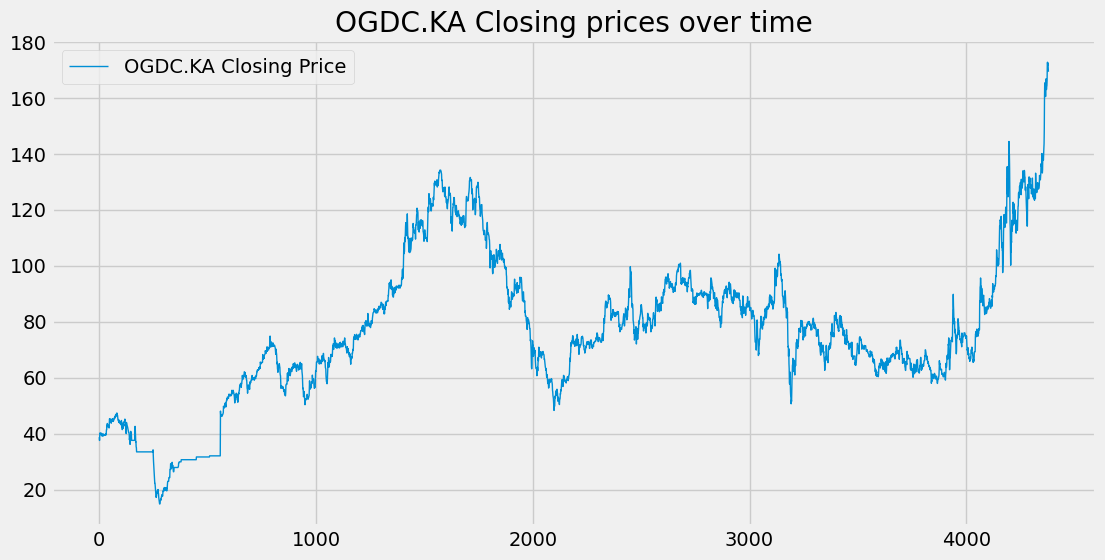

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

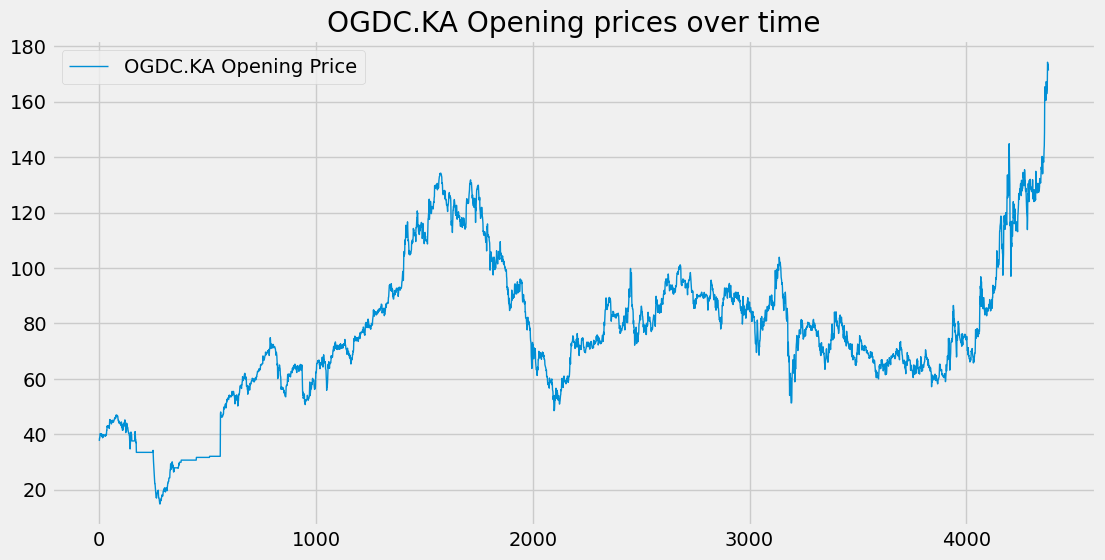

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

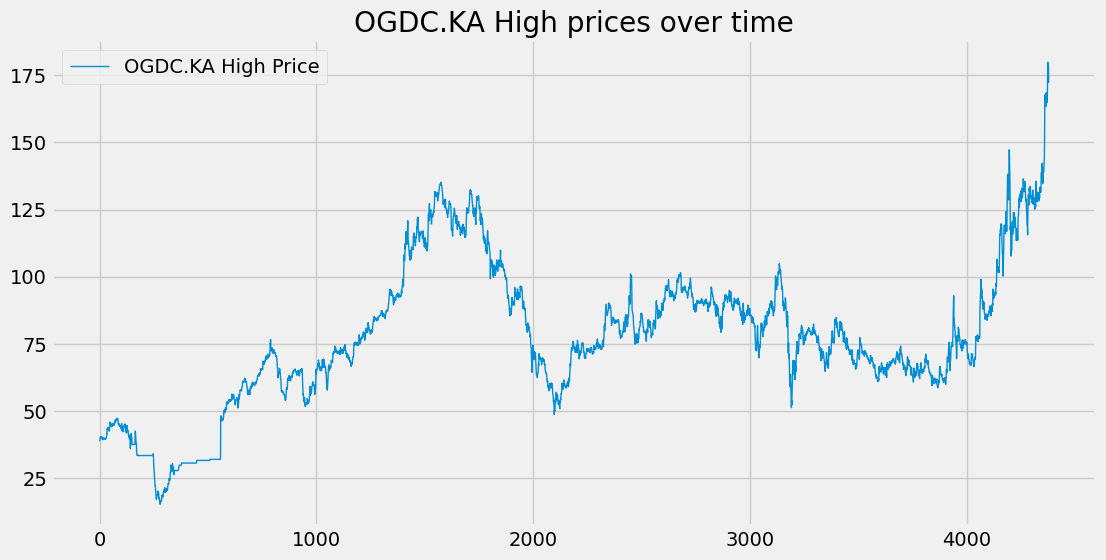

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

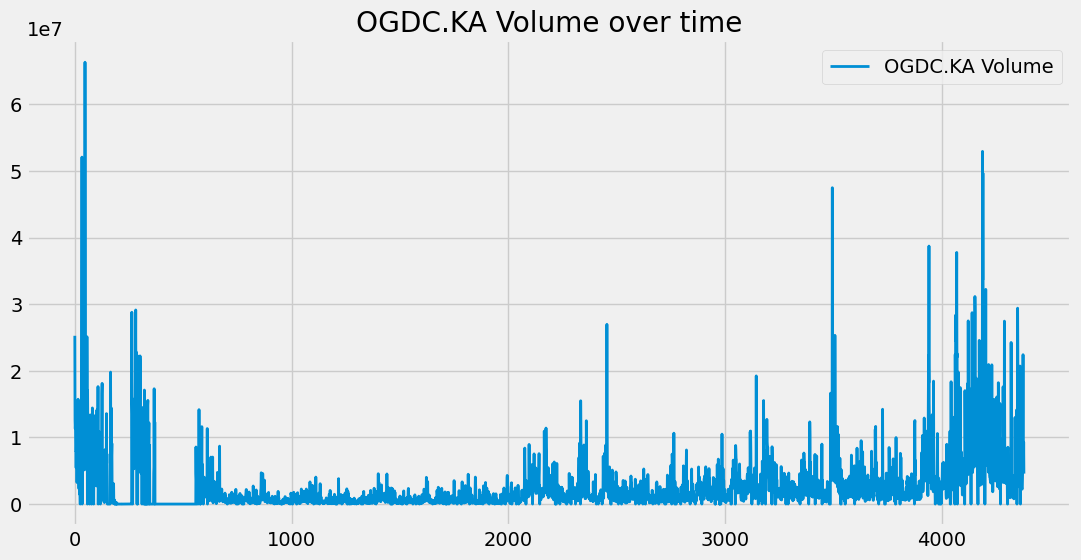

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
movingaverage100 = df.Close.rolling(100).mean()

In [ ]:
movingaverage100

Ticker,OGDC.KA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4375,134.635116
4376,135.107369
4377,135.614578
4378,136.123200


In [ ]:
movingaverage200 = df.Close.rolling(200).mean()

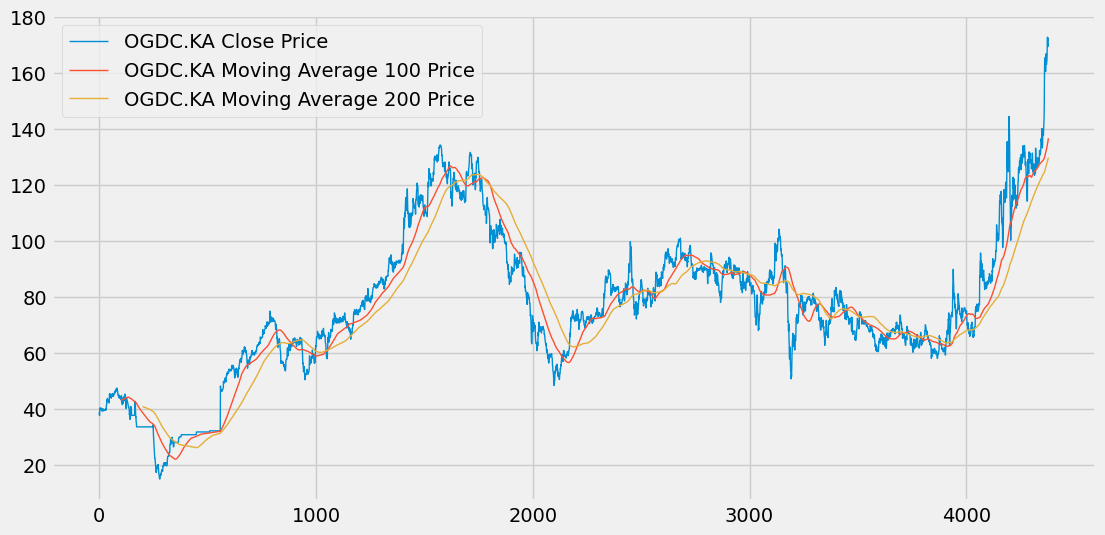

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(movingaverage100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(movingaverage200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
expma100 = df.Close.ewm(span=100, adjust = False).mean()

In [ ]:
expma200 = df['Close'].ewm(span=200, adjust = False).mean()

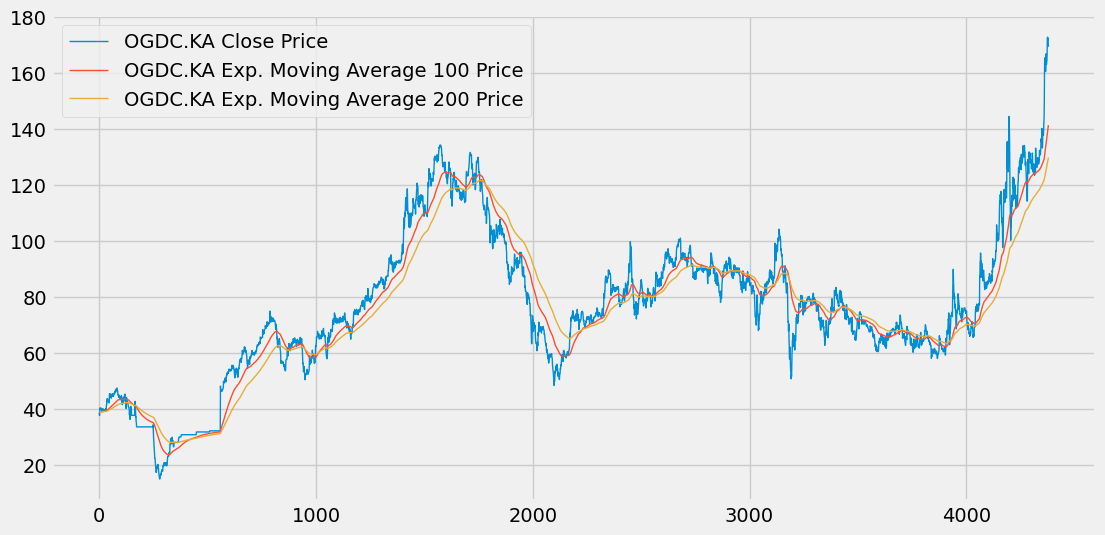

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(expma100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(expma100, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# Training & Testing Part

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
data_training.shape

(3066, 1)

In [ ]:
data_testing.shape

(1314, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.20049421],
       [0.19049725],
       [0.20618698],
       ...,
       [0.54406088],
       [0.53638428],
       [0.54003214]])

In [ ]:
data_training_array.shape[0]

3066

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2966, 100, 1)

In [ ]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - loss: 0.0813
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0092
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0078
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0071
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0073
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0058
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0053
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0056
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0052
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0047
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0046
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0044
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0048
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0041
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0039
Epo

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,OGDC.KA
0,82.432701
1,81.423256
2,84.987534
3,89.218483
4,88.938103


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1314, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


In [ ]:
y_predicted.shape

(1314, 1)

In [ ]:
scaler.scale_

array([0.00819206])

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

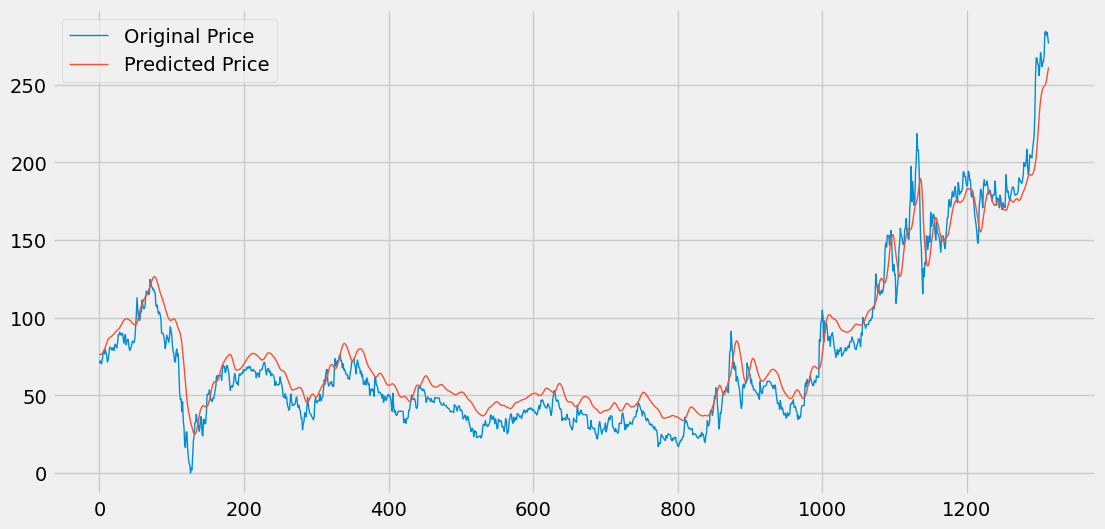

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.h5')